In [60]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

from matplotlib import pyplot as plt

In [61]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [62]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State with variables R L E V
    t: time step
    system: System with alpha beta gamma mu rho theta
    returns: State object
    """
    r, l, e, v = state
    unpack(system)
    
    gamma= 1.36  #'rate at which uninfected cd4 arise'
    mu= 0.00136  #'hiv independent death rate of uninfected cd4'
    tau= 0.2     #'proportion of cells activated'
    beta=0.00027 #'rate of infection of cd4 per virion'
    rho=0.1      #'proportion of cells becoming latently infected'
    alpha=.036   #'activation rate of latently infected cells'
    sigma= 2     #'removal of cell free virus'
    delta=.33    #'death of actively infected cd4'
    pi=100       #'rate of production of virions by actively infected cells'
    
    rateR= (gamma * tau) - (mu * r) - (beta * r * v) 
    rateL= (rho * beta * r * v) - (mu * l) - (alpha * l) 
    rateE= ((1 - rho) * beta * r * l) + (alpha * l) * (delta * e) 
    rateV= (pi * e) - (sigma * v) 
    
    r += rateR*dt
    l += rateL*dt
    e += rateE*dt
    v += rateV*dt
    
    return State(r=r, l=l, e=e, v=v)

In [63]:
def plot_results(r, l, e):

    plot(r, '--', label='cd4')
    plot(l, '-', label='latent cd4')
    plot(e, ':', label='actively cd4')
    decorate(xlabel='Time (days)',
             ylabel='number of cells')

In [64]:
init = State(r=200, l=0, e=0, v=100)

,values
r,200
l,0
e,0
v,100


In [65]:
system = System(gamma = 1.36,  
                mu = 0.00136,  
                tau = 0.2,     
                beta = 0.00027, 
                rho = 0.1,      
                alpha = 0.036,   
                sigma = 2,     
                delta = 0.33,    
                pi = 100,
                dt = 0.25,
                t0 = 1,
                t_end = 450)

,values
gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
rho,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000
dt,0.25000


In [66]:
update_func(init, 0, system)

,values
r,198.650
l,0.135
e,0.000
v,50.000


In [67]:
results = run_simulation(system, update_func)

,r,l,e,v
1.0,200,0,0,100
2.0,198.65,0.135,0,50
3.0,197.98,0.200783,0.00162918,25
4.0,197.647,0.232317,0.00404503,12.5407
5.0,197.48,0.246878,0.00683726,6.37149
6.0,197.396,0.253066,0.00980405,3.35668
7.0,197.352,0.255174,0.0128461,1.92344
8.0,197.327,0.255353,0.0159152,1.28287
9.0,197.311,0.254677,0.0189883,1.03932
10.0,197.298,0.253683,0.0220554,0.994367


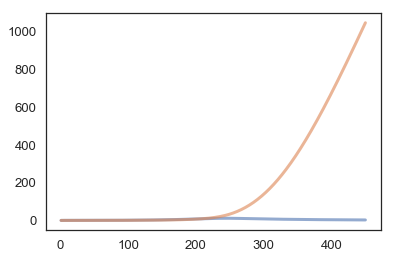

In [68]:
plot(results.index, results.l)
plot(results.index, results.e)

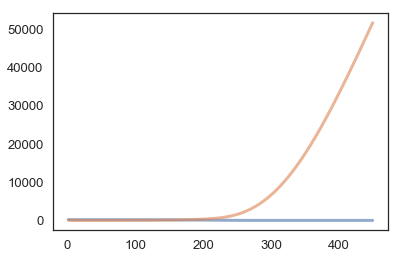

In [69]:
plot(results.index, results.r)
plot(results.index, results.v)

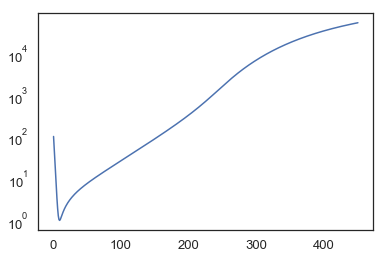

In [70]:
plt.plot(results.v)
plt.yscale('log')